![image info](https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/images/banner_1.png)

# Proyecto 1 - Predicción de popularidad en canción - 
# ARCHIVO UTILIZADO PARA LA API - Árboles de Decisión

En este proyecto podrán poner en práctica sus conocimientos sobre modelos predictivos basados en árboles y ensambles, y sobre la disponibilización de modelos. Para su desarrollo tengan en cuenta las instrucciones dadas en la "Guía del proyecto 1: Predicción de popularidad en canción".

**Entrega**: La entrega del proyecto deberán realizarla durante la semana 4. Sin embargo, es importante que avancen en la semana 3 en el modelado del problema y en parte del informe, tal y como se les indicó en la guía.

Para hacer la entrega, deberán adjuntar el informe autocontenido en PDF a la actividad de entrega del proyecto que encontrarán en la semana 4, y subir el archivo de predicciones a la [competencia de Kaggle](https://www.kaggle.com/competitions/miad-2025-12-prediccion-popularidad-en-cancion).

## Datos para la predicción de popularidad en cancion

En este proyecto se usará el conjunto de datos de datos de popularidad en canciones, donde cada observación representa una canción y se tienen variables como: duración de la canción, acusticidad y tempo, entre otras. El objetivo es predecir qué tan popular es la canción. Para más detalles puede visitar el siguiente enlace: [datos](https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset).

## Ejemplo predicción conjunto de test para envío a Kaggle

En esta sección encontrarán el formato en el que deben guardar los resultados de la predicción para que puedan subirlos a la competencia en Kaggle.

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [55]:
# Importación librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score


In [10]:
# Carga de datos de archivo .csv
dataTraining = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2025/main/datasets/dataTrain_Spotify.csv')
dataTesting = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2025/main/datasets/dataTest_Spotify.csv', index_col=0)

In [12]:
# Visualización datos de entrenamiento
dataTraining.head()

,Unnamed: 0,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity
0,0,7hUhmkALyQ8SX9mJs5XI3D,Love and Rockets,Love and Rockets,Motorcycle,211533,False,0.305,0.8490,9,...,1,0.0549,0.000058,0.056700,0.4640,0.3200,141.793,4,goth,22
1,1,5x59U89ZnjZXuNAAlc8X1u,Filippa Giordano,Filippa Giordano,"Addio del passato - From ""La traviata""",196000,False,0.287,0.1900,7,...,0,0.0370,0.930000,0.000356,0.0834,0.1330,83.685,4,opera,22
2,2,70Vng5jLzoJLmeLu3ayBQq,Susumu Yokota,Symbol,Purple Rose Minuet,216506,False,0.583,0.5090,1,...,1,0.0362,0.777000,0.202000,0.1150,0.5440,90.459,3,idm,37
3,3,1cRfzLJapgtwJ61xszs37b,Franz Liszt;YUNDI,Relajación y siestas,"Liebeslied (Widmung), S. 566",218346,False,0.163,0.0368,8,...,1,0.0472,0.991000,0.899000,0.1070,0.0387,69.442,3,classical,0
4,4,47d5lYjbiMy0EdMRV8lRou,Scooter,Scooter Forever,The Darkside,173160,False,0.647,0.9210,2,...,1,0.1850,0.000939,0.371000,0.1310,0.1710,137.981,4,techno,27


In [14]:
# Visualización datos de test
dataTesting.head()

,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,6KwkVtXm8OUp2XffN5k7lY,Hillsong Worship,No Other Name,No Other Name,440247,False,0.369,0.598,7,-6.984,1,0.0304,0.00511,0.000000,0.176,0.0466,148.014,4,world-music
1,2dp5I5MJ8bQQHDoFaNRFtX,Internal Rot,Grieving Birth,Failed Organum,93933,False,0.171,0.997,7,-3.586,1,0.1180,0.00521,0.801000,0.420,0.0294,122.223,4,grindcore
2,5avw06usmFkFrPjX8NxC40,Zhoobin Askarieh;Ali Sasha,Noise A Noise 20.4-1,"Save the Trees, Pt. 1",213578,False,0.173,0.803,9,-10.071,0,0.1440,0.61300,0.001910,0.195,0.0887,75.564,3,iranian
3,75hT0hvlESnDJstem0JgyR,Bryan Adams,All I Want For Christmas Is You,Merry Christmas,151387,False,0.683,0.511,6,-5.598,1,0.0279,0.40600,0.000197,0.111,0.5980,109.991,3,rock
4,4bY2oZGA5Br3pTE1Jd1IfY,Nogizaka46,バレッタ TypeD,月の大きさ,236293,False,0.555,0.941,9,-3.294,0,0.0481,0.48400,0.000000,0.266,0.8130,92.487,4,j-idol


#### 1. Preprocesamiento (Spotify Popularity) 

##### 1.1 Revisión de la estructura y valores nulos

In [16]:
# Revisión de estructura y valores nulos en datos de entrenamiento
print("Información de dataTraining:")
dataTraining.info()

# Estadísticas descriptivas de las variables numéricas
print("\nEstadísticas de dataTraining:")
display(dataTraining.describe())

# Revisión de valores nulos por columna
print("\nValores nulos en dataTraining:")
display(dataTraining.isnull().sum())

# Comparación con dataTesting
print("\nInformación de dataTesting:")
dataTesting.info()

print("\nValores nulos en dataTesting:")
display(dataTesting.isnull().sum())


Información de dataTraining:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79800 entries, 0 to 79799
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        79800 non-null  int64  
 1   track_id          79800 non-null  object 
 2   artists           79800 non-null  object 
 3   album_name        79800 non-null  object 
 4   track_name        79800 non-null  object 
 5   duration_ms       79800 non-null  int64  
 6   explicit          79800 non-null  bool   
 7   danceability      79800 non-null  float64
 8   energy            79800 non-null  float64
 9   key               79800 non-null  int64  
 10  loudness          79800 non-null  float64
 11  mode              79800 non-null  int64  
 12  speechiness       79800 non-null  float64
 13  acousticness      79800 non-null  float64
 14  instrumentalness  79800 non-null  float64
 15  liveness          79800 non-null  float64
 16  valence    

,Unnamed: 0,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity
count,79800.000000,7.980000e+04,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000
mean,39899.500000,2.279022e+05,0.567318,0.641529,5.307043,-8.263741,0.637732,0.084750,0.314979,0.157319,0.213313,0.474267,122.076559,3.902556,33.265301
std,23036.420078,1.050599e+05,0.173110,0.251441,3.562186,5.035504,0.480659,0.105657,0.332512,0.310792,0.190075,0.259010,29.941937,0.434284,22.330871
min,0.000000,1.338600e+04,0.000000,0.000019,0.000000,-49.307000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19949.750000,1.744360e+05,0.456000,0.472000,2.000000,-10.006000,0.000000,0.035900,0.017000,0.000000,0.097900,0.261000,99.081250,4.000000,17.000000
50%,39899.500000,2.128130e+05,0.581000,0.685000,5.000000,-7.012000,1.000000,0.049000,0.169000,0.000041,0.132000,0.464000,122.009000,4.000000,35.000000
75%,59849.250000,2.614260e+05,0.695000,0.854000,8.000000,-5.000000,1.000000,0.084500,0.598000,0.050500,0.273000,0.684000,140.054000,4.000000,50.000000
max,79799.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,222.605000,5.000000,100.000000



Valores nulos en dataTraining:


Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
popularity          0
dtype: int64


Información de dataTesting:
<class 'pandas.core.frame.DataFrame'>
Index: 34200 entries, 0 to 34199
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          34200 non-null  object 
 1   artists           34199 non-null  object 
 2   album_name        34199 non-null  object 
 3   track_name        34199 non-null  object 
 4   duration_ms       34200 non-null  int64  
 5   explicit          34200 non-null  bool   
 6   danceability      34200 non-null  float64
 7   energy            34200 non-null  float64
 8   key               34200 non-null  int64  
 9   loudness          34200 non-null  float64
 10  mode              34200 non-null  int64  
 11  speechiness       34200 non-null  float64
 12  acousticness      34200 non-null  float64
 13  instrumentalness  34200 non-null  float64
 14  liveness          34200 non-null  float64
 15  valence           34200 non-null  float64
 16  tempo           

track_id            0
artists             1
album_name          1
track_name          1
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

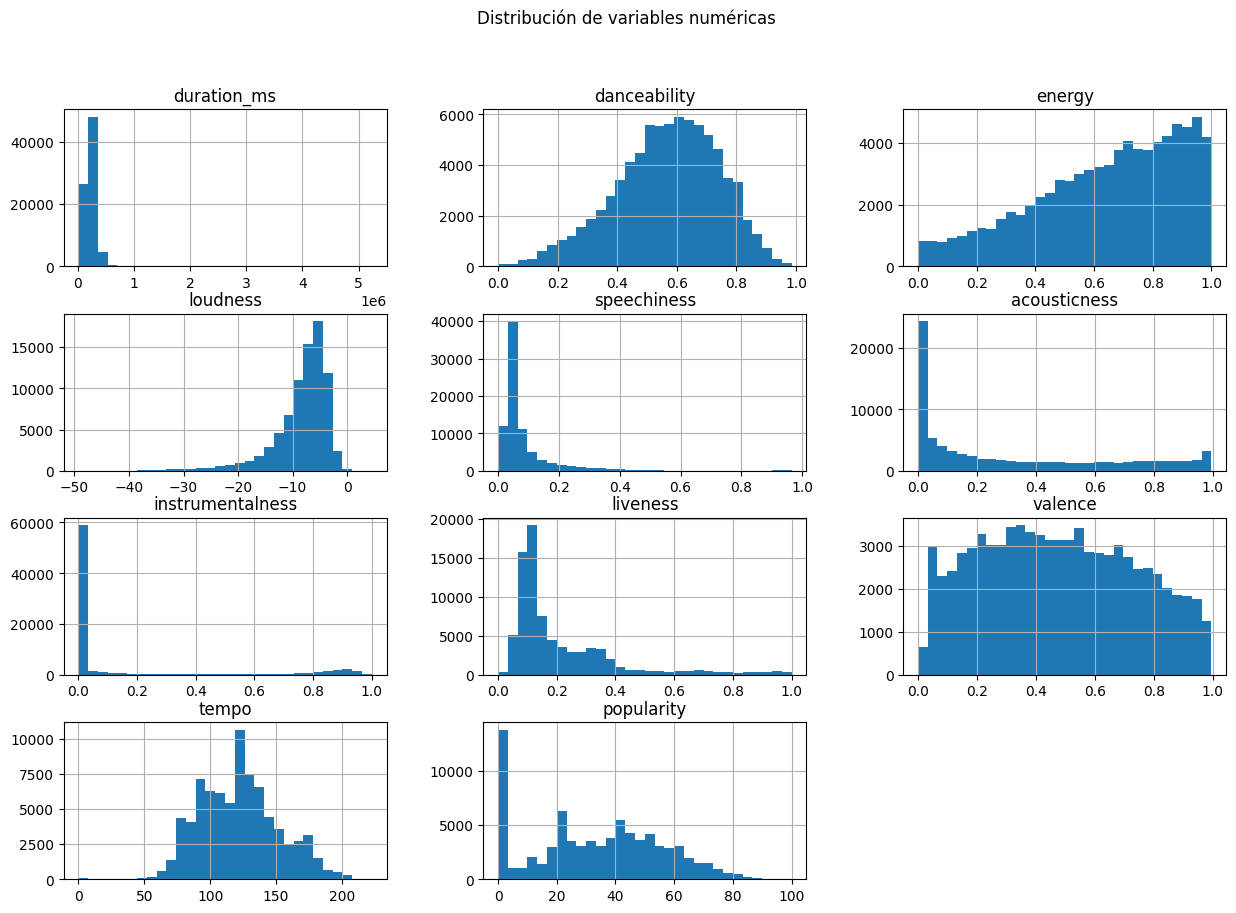

In [18]:
# 1. Histogramas variables numéricas
num_vars = ['duration_ms', 'danceability', 'energy', 'loudness', 
            'speechiness', 'acousticness', 'instrumentalness', 
            'liveness', 'valence', 'tempo',"popularity"]

dataTraining[num_vars].hist(bins=30, figsize=(15,10))
plt.suptitle("Distribución de variables numéricas")
plt.show()


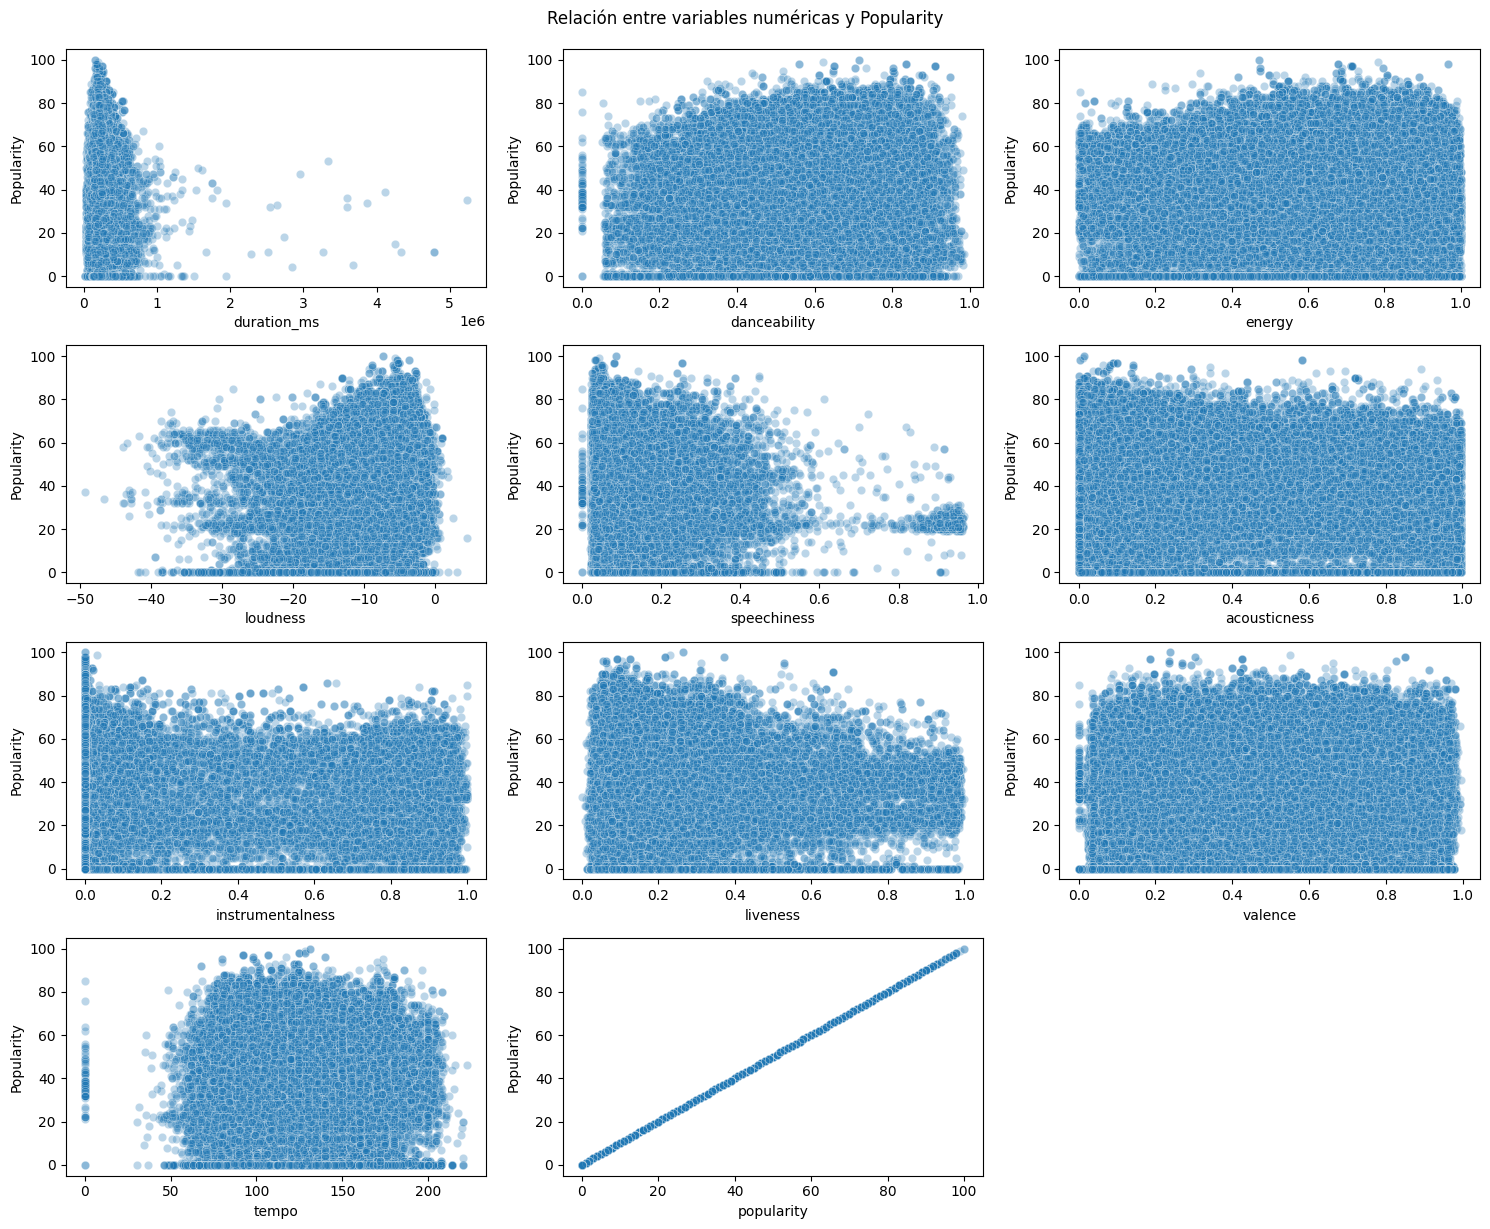

In [20]:
# Scatterplots entre variables numéricas y Popularity
plt.figure(figsize=(15,12))
for idx, col in enumerate(num_vars):
    plt.subplot(4,3,idx+1)
    sns.scatterplot(x=dataTraining[col], y=dataTraining['popularity'], alpha=0.3)
    plt.xlabel(col)
    plt.ylabel('Popularity')
    plt.tight_layout()

plt.suptitle("Relación entre variables numéricas y Popularity", y=1.02)
plt.show()


##### 1.2 Codificación de variables categóricas

In [28]:
# 1. Preprocesamiento para dataTraining

# Copia del dataset original de entrenamiento
data = dataTraining.copy()

# Codificación booleana de 'explicit'
data['explicit'] = data['explicit'].astype(int)

# Target Encoding para 'track_genre' en dataTraining
# Calcular la media de popularidad por género
encoding_map = data.groupby('track_genre')['popularity'].mean()

# Reemplazar 'track_genre' por su media de popularidad (target encoding)
data['track_genre_encoded'] = data['track_genre'].map(encoding_map)

# Eliminar la columna original 'track_genre'
data.drop(columns=['track_genre'], inplace=True)

# Verificación de columnas en dataTraining procesado
print(f"DataTraining procesado - columnas: {data.shape[1]}")
display(data.head())



DataTraining procesado - columnas: 21


,Unnamed: 0,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity,track_genre_encoded
0,0,7hUhmkALyQ8SX9mJs5XI3D,Love and Rockets,Love and Rockets,Motorcycle,211533,0,0.305,0.8490,9,...,1,0.0549,0.000058,0.056700,0.4640,0.3200,141.793,4,22,28.882440
1,1,5x59U89ZnjZXuNAAlc8X1u,Filippa Giordano,Filippa Giordano,"Addio del passato - From ""La traviata""",196000,0,0.287,0.1900,7,...,0,0.0370,0.930000,0.000356,0.0834,0.1330,83.685,4,22,24.859155
2,2,70Vng5jLzoJLmeLu3ayBQq,Susumu Yokota,Symbol,Purple Rose Minuet,216506,0,0.583,0.5090,1,...,1,0.0362,0.777000,0.202000,0.1150,0.5440,90.459,3,37,15.750760
3,3,1cRfzLJapgtwJ61xszs37b,Franz Liszt;YUNDI,Relajación y siestas,"Liebeslied (Widmung), S. 566",218346,0,0.163,0.0368,8,...,1,0.0472,0.991000,0.899000,0.1070,0.0387,69.442,3,0,12.313754
4,4,47d5lYjbiMy0EdMRV8lRou,Scooter,Scooter Forever,The Darkside,173160,0,0.647,0.9210,2,...,1,0.1850,0.000939,0.371000,0.1310,0.1710,137.981,4,27,38.806590


##### 1.3 Escalamiento de variables (revisar si es necesario - depende del modelo)

##### 1.4 Separación en variables predictoras (X) y variable objetivo (y)

In [31]:
# Variable objetivo
y = data['popularity']

# Variables predictoras (excluyendo identificadores y la variable objetivo)
X = data.drop(columns=['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'popularity'])

# Verificación de dimensiones
print("Shape de X:", X.shape)
print("Shape de y:", y.shape)


Shape de X: (79800, 15)
Shape de y: (79800,)


##### 1.6 División de entrenamiento y validación

In [33]:
# División  entrenamiento,  validación
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.01, random_state=42)

# Verificación de tamaños
print("Tamaño X_train:", X_train.shape)
print("Tamaño X_val:", X_val.shape)
print("Tamaño y_train:", y_train.shape)
print("Tamaño y_val:", y_val.shape)

Tamaño X_train: (79002, 15)
Tamaño X_val: (798, 15)
Tamaño y_train: (79002,)
Tamaño y_val: (798,)


##### 2. Modelo

###### Árbol de Decisión 

In [35]:
# Definición del modelo
dt_model = DecisionTreeRegressor(random_state=42)

# Entrenamiento
dt_model.fit(X_train, y_train)

# Predicción en validación
y_pred_dt = dt_model.predict(X_val)

# Métricas
rmse_dt = np.sqrt(mean_squared_error(y_val, y_pred_dt))
mae_dt = mean_absolute_error(y_val, y_pred_dt)

print(f"Árbol de decisión - RMSE: {rmse_dt:.2f}")
print(f"Árbol de decisión - MAE: {mae_dt:.2f}")

Árbol de decisión - RMSE: 22.51
Árbol de decisión - MAE: 14.23


In [38]:
# Ver las columnas (variables) que espera el modelo
print(X_train.columns)

# Ver los tipos de datos de cada columna
print(X_train.dtypes)


Index(['duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre_encoded'],
      dtype='object')
duration_ms              int64
explicit                 int32
danceability           float64
energy                 float64
key                      int64
loudness               float64
mode                     int64
speechiness            float64
acousticness           float64
instrumentalness       float64
liveness               float64
valence                float64
tempo                  float64
time_signature           int64
track_genre_encoded    float64
dtype: object


In [44]:
# Seleccionar una fila de prueba (puede ser la primera o aleatoria)
fila_test = X_train.iloc[15000]  # Cambie el índice si quiere otra fila

# Mostrar los valores de esa fila
print(fila_test)

# Convertirla a diccionario (formato JSON)
fila_dict = fila_test.to_dict()

# Mostrar el diccionario
print(fila_dict)


duration_ms            276426.000000
explicit                    0.000000
danceability                0.547000
energy                      0.927000
key                         5.000000
loudness                   -3.020000
mode                        1.000000
speechiness                 0.070000
acousticness                0.273000
instrumentalness            0.000008
liveness                    0.371000
valence                     0.862000
tempo                     110.095000
time_signature              4.000000
track_genre_encoded        38.847458
Name: 7682, dtype: float64
{'duration_ms': 276426.0, 'explicit': 0.0, 'danceability': 0.547, 'energy': 0.927, 'key': 5.0, 'loudness': -3.02, 'mode': 1.0, 'speechiness': 0.07, 'acousticness': 0.273, 'instrumentalness': 8.15e-06, 'liveness': 0.371, 'valence': 0.862, 'tempo': 110.095, 'time_signature': 4.0, 'track_genre_encoded': 38.847457627118644}


##### Disponibilizar el modelo de Árbol de Decisión en AWS EC2

In [59]:
# Guardar el modelo entrenado como archivo .pkl
import pickle
with open('decision_tree_model.pkl', 'wb') as f:
    pickle.dump(dt_model, f)

print("Modelo guardado como 'decision_tree_model.pkl'")


Modelo guardado como 'decision_tree_model.pkl'


In [61]:

# Verificar las columnas utilizadas
feature_columns = X_train.columns.tolist()
print("\nColumnas usadas por el modelo:")
print(feature_columns)


Columnas usadas por el modelo:
['duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre_encoded']
